In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
dataset= pd.read_csv('data/netflix_titles.csv')
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


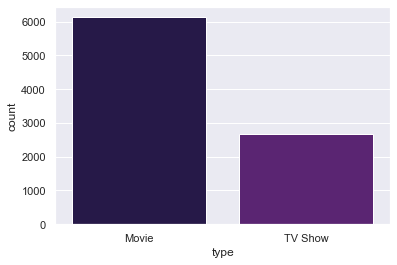

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
palette=sns.color_palette('magma')

movie_tvshow = sns.countplot(x='type', data=dataset, palette=palette)
plt.show()

In [6]:
dataset['country'].nunique()

748

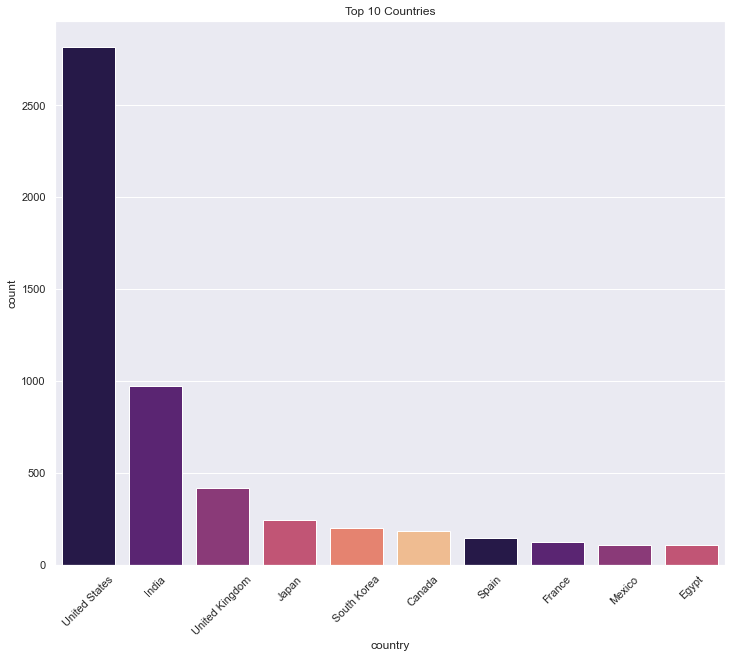

In [7]:
#Countplot for the highest 10 production countries
plt.figure(figsize=(12,10))
plt.title('Top 10 Countries')
countries =sns.countplot(x='country', data=dataset, order=dataset['country'].value_counts().index[:10], palette=palette)
countries.set_xticklabels(countries.get_xticklabels(), rotation=45)
plt.show()

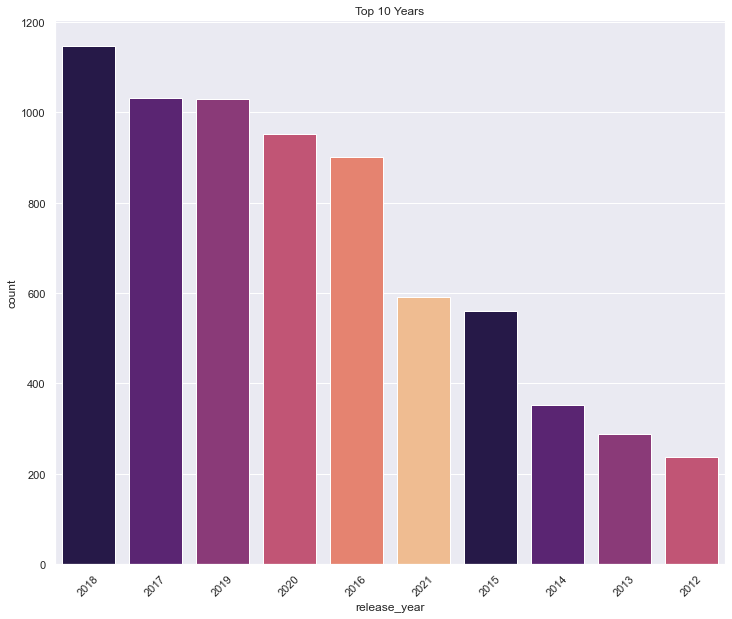

In [8]:
#Countplot for the years with highest number of releases
plt.figure(figsize=(12,10))
plt.title('Top 10 Years')
years =sns.countplot(x='release_year', data=dataset, order=dataset['release_year'].value_counts().index[:10], palette=palette)
years.set_xticklabels(years.get_xticklabels(), rotation=45)
plt.show()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

Building the recommendation model based on the description

In [10]:
tfidf_matrix = tfidf.fit_transform(dataset['description'])
tfidf_matrix.shape

(8807, 18895)

In [12]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [15]:
indices = pd.Series(dataset.index, index=dataset['title']).drop_duplicates()


#Recommendation Fucntion

In [19]:

def get_recommendations(title):
    idx = indices[title]

    #Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    #Sort the movies based on the cosine similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    #Geting the scores of the 10 most similar movies
    #Started at index 1 because index 0 is the one with the 1 cosine similarity which is the same show
    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]
    return dataset['title'].iloc[movie_indices]

In [20]:
get_recommendations('Riverdale')

1038                       Dancing Angels
2173                               Moesha
4591                           My Suicide
6996                             Hormones
2979                         THE STRANGER
2790                   Greenhouse Academy
1982                             Anaamika
1986                     Nee Enge En Anbe
3087    Yanxi Palace: Princess Adventures
5225                        Kingdom of Us
7309                         Lion's Heart
1685                           Ainu Mosir
3813                                Maria
1750                       Dawson's Creek
2391                                Milea
1825                             The Kite
8574                     ThirTEEN Terrors
3276                     My MVP Valentine
32                          Sex Education
Name: title, dtype: object

In [21]:
get_recommendations('How to Get Away with Murder')

7174                                     Kay Dyache Bola
1062                                          Law School
2721                                              Duniya
7546                                  My Sister's Keeper
6559                                               Dandy
7793                                         Primal Fear
953                                      The Whole Truth
3025                                          MindGamers
4504                                                Rake
355                                   The Lincoln Lawyer
2400                                          The Search
7821                                             Rahasya
3121    Don't F**k with Cats: Hunting an Internet Killer
1387                                 The Next Three Days
7735                                        Philadelphia
8117                                               Suits
122                                           In the Cut
8520                           